In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/LoanApplications.csv')

In [2]:
df.head()

,Week,Applications
0,1,71
1,2,57
2,3,62
3,4,64
4,5,65


In [3]:
df.set_index('Week', inplace=True)

In [4]:
df.head()

,Applications
Week,
1,71
2,57
3,62
4,64
5,65


Populating the interactive namespace from numpy and matplotlib


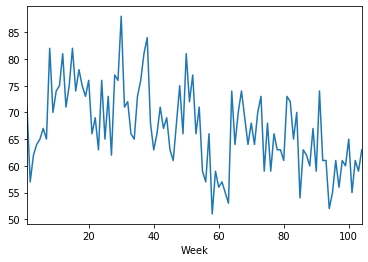

In [5]:
%pylab inline
df['Applications'].plot(kind = 'line')

In [6]:
import pandas as pd
import numpy as np
airline = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


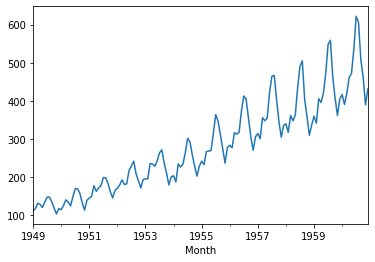

In [7]:
airline['Thousands of Passengers'].plot(kind = 'line')

In [8]:
moving_avg_6  =  airline['Thousands of Passengers'].rolling(window = 6).mean()

In [9]:
moving_avg_12 = airline['Thousands of Passengers'].rolling(12).mean()

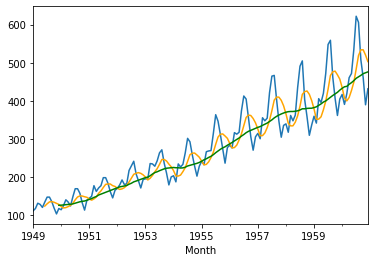

In [10]:
airline['Thousands of Passengers'].plot()
moving_avg_6.plot(color='orange')
moving_avg_12.plot(color='green')


## Seasonal Decomposition

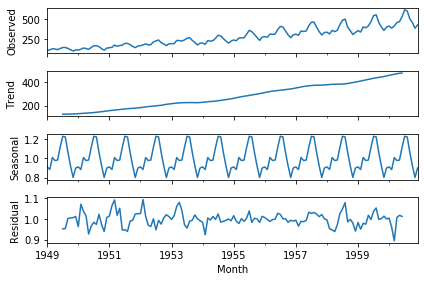

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.plot();


In [16]:
import pandas
a = pandas.Series([1,2,3,4,5,6,7,8,9,10,11,12])
a.rolling(window = 6).mean()


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     3.5
6     4.5
7     5.5
8     6.5
9     7.5
10    8.5
11    9.5
dtype: float64

In [17]:
(1 + 2 + 3 +4 + 5 + 6) / 6

3.5

In [18]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()


In [20]:
?airline['Thousands of Passengers'].ewm

In [21]:
airline['EWMA12'].head()

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
Name: EWMA12, dtype: float64

In [22]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()


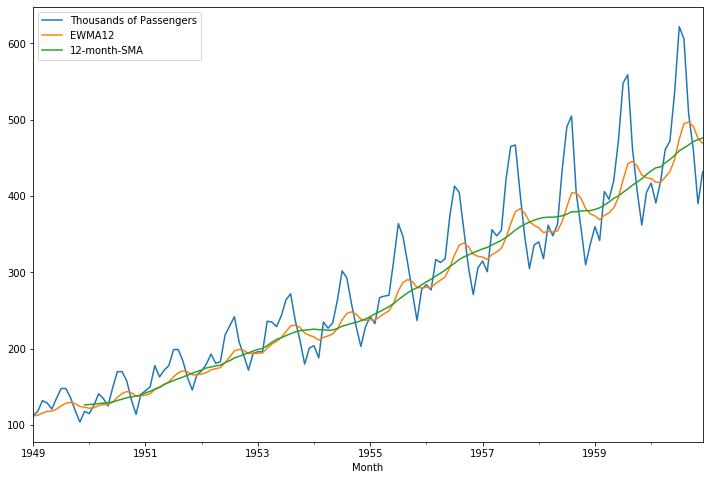

In [23]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)


### Holt-Winters 方法

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)
df.index
df.index.freq = 'MS'
df.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [25]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()


,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


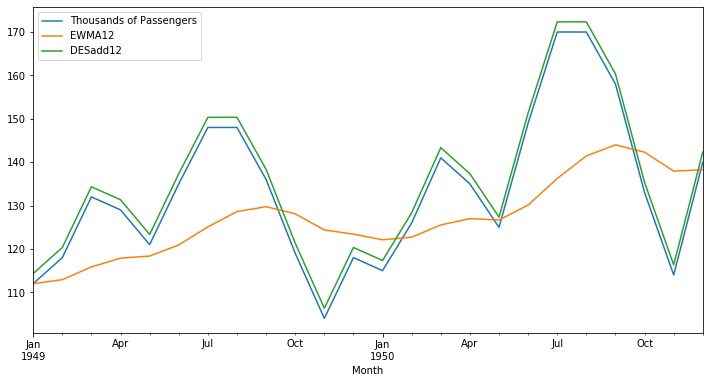

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)



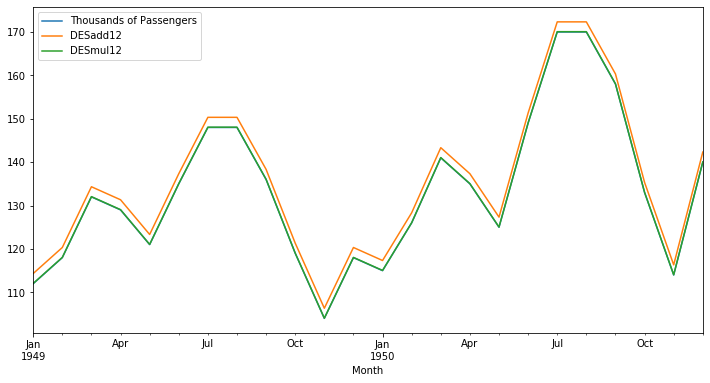

In [28]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)


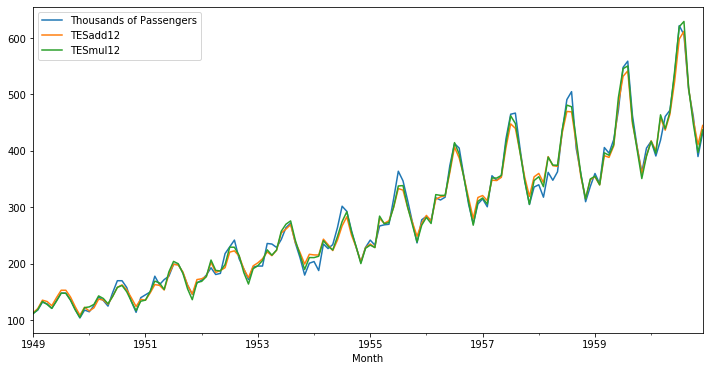

In [29]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)


- weather, people
- weather(t-1), people(t-1) => people(t)
- weather(t-1),weather(t-2), people(t-1),people(t-2) => people(t)

In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [31]:
len(df)

144

In [34]:
len(df) * 0.75

108.0

In [35]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]


In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(
    train_data['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12).fit()


In [37]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [39]:
train_data.tail()

,Thousands of Passengers
Month,
1957-08-01,467
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336


In [40]:
test_data.head()

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363


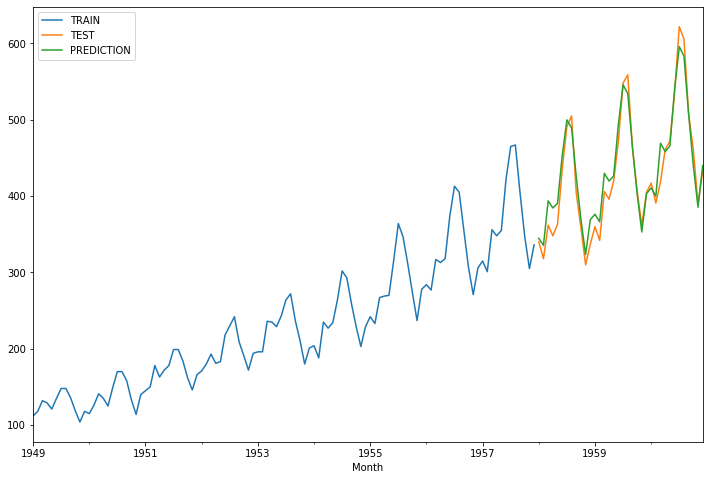

In [42]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));
test_predictions.plot(legend=True,label='PREDICTION');


In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test_data,test_predictions)

15.56316771169738

In [45]:
mean_squared_error(test_data,test_predictions)

376.02090269271736

In [46]:
np.sqrt(mean_squared_error(test_data,test_predictions))

19.391258409208962

## ARIMA

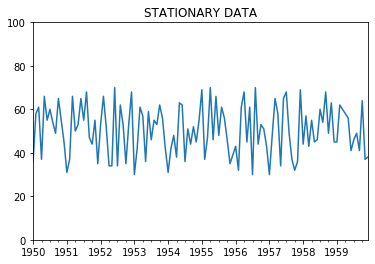

In [47]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/samples.csv',index_col=0,parse_dates=True) 
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

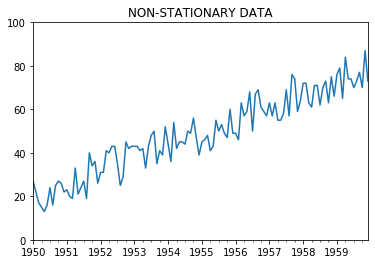

In [48]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

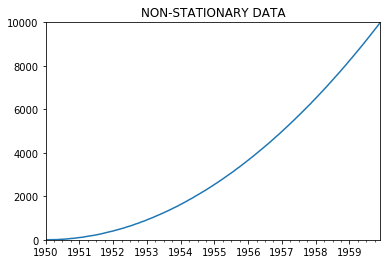

In [49]:
df2['c'].plot(ylim=[0,10000],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [53]:
df2['b'].head()

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
Name: b, dtype: int64

In [52]:
df2['b'].shift(1).head()

1950-01-01     NaN
1950-02-01    27.0
1950-03-01    22.0
1950-04-01    17.0
1950-05-01    15.0
Name: b, dtype: float64

In [54]:
df2['d1b'] = df2['b'] - df2['b'].shift(1)
df2['d1b'].head()

1950-01-01    NaN
1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
Name: d1b, dtype: float64

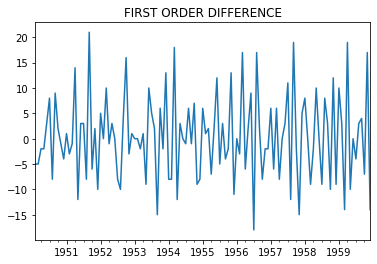

In [55]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

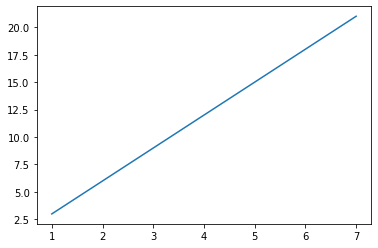

In [56]:
x = [1,2,3,4,5,6,7]
y = [3,6,9,12,15,18,21]
plt.plot(x,y)

In [57]:
import pandas
y0 = pandas.Series([3,6,9,12,15,18,21])
y1 = y0- y0.shift(1) 

In [58]:
y1

0    NaN
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
6    3.0
dtype: float64

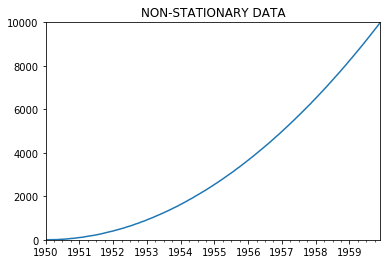

In [59]:
df2['c'].plot(ylim=[0,10000],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [60]:
df2['c1b'] = df2['c'] - df2['c'].shift(1)

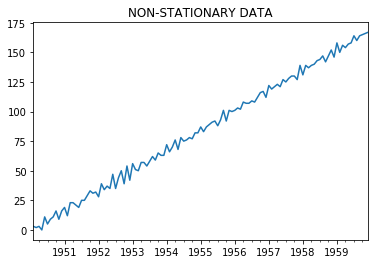

In [62]:
df2['c1b'].plot(title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [63]:
df2['c2b']  = df2['c1b'] - df2['c1b'].shift(1)

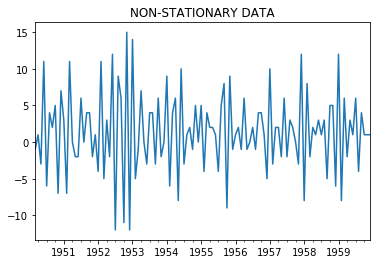

In [64]:
df2['c2b'].plot(title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

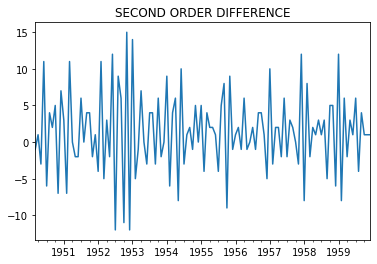

In [65]:
df2['d2c'] = df2['c'].diff().diff()
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True)

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load a non-stationary dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'


In [69]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


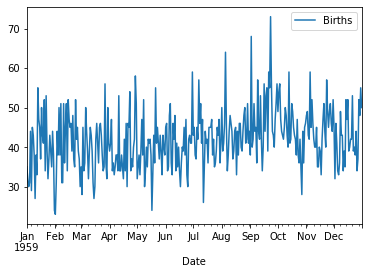

In [68]:
df2.plot()

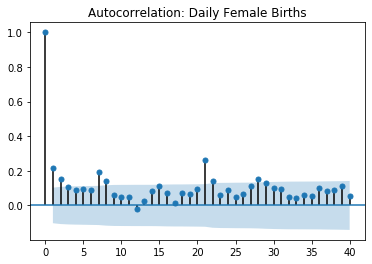

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);


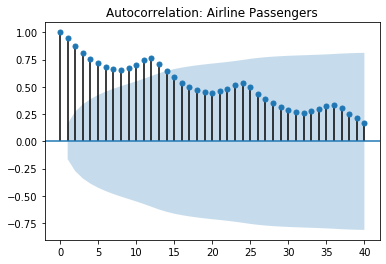

In [72]:
acf(df1['Thousands of Passengers'])
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);


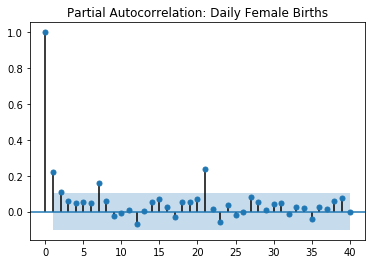

In [74]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);


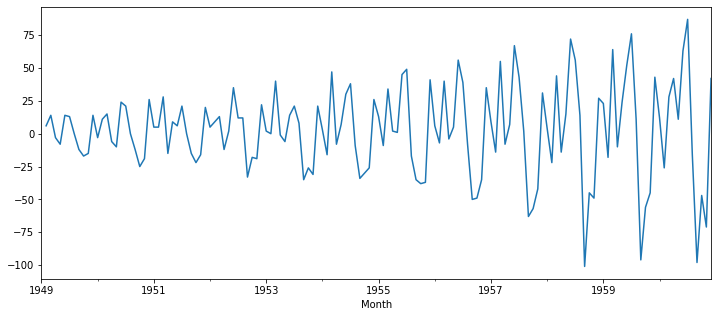

In [75]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1)
df1['d1'].plot(figsize=(12,5))


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


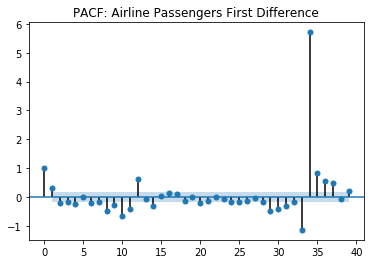

In [76]:
title='PACF: Airline Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));

